# Experiment 9

GASP with multiple perions i.e with a 4 Pi gradient

In [19]:
import sys
sys.path.insert(0, '../../')
import numpy as np
from gasp import responses, simulation, dataset

In [20]:
width = 256
height = 256
alpha = np.deg2rad(30)
gradient = 4 * np.pi
TRs = [5e-3, 10e-3, 20e-3]
phantom_type = 'circle'

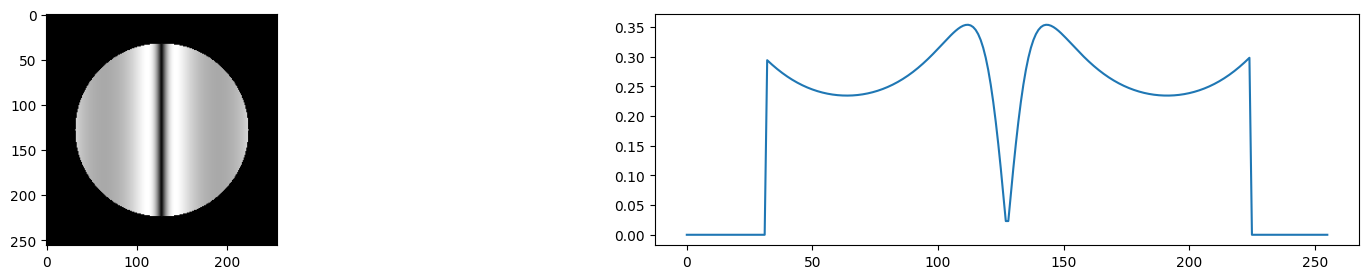

In [21]:
M = simulation.simulate_ssfp(alpha = alpha, gradient = gradient, phantom_type=phantom_type, TRs=TRs)
simulation.view_gasp_input(M)

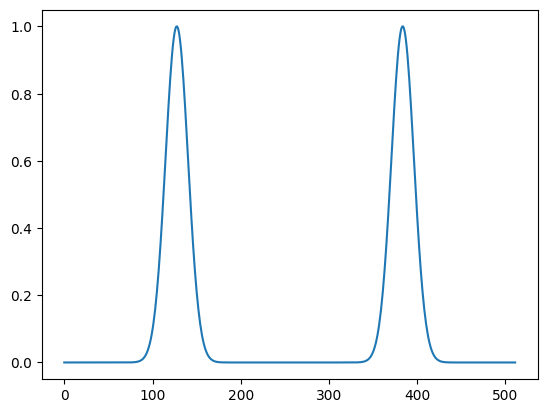

In [22]:
import matplotlib.pyplot as plt
d = responses.gaussian(width, bw=0.2, shift=0)
d = responses.make_periodic(d, 2)
plt.plot(d)

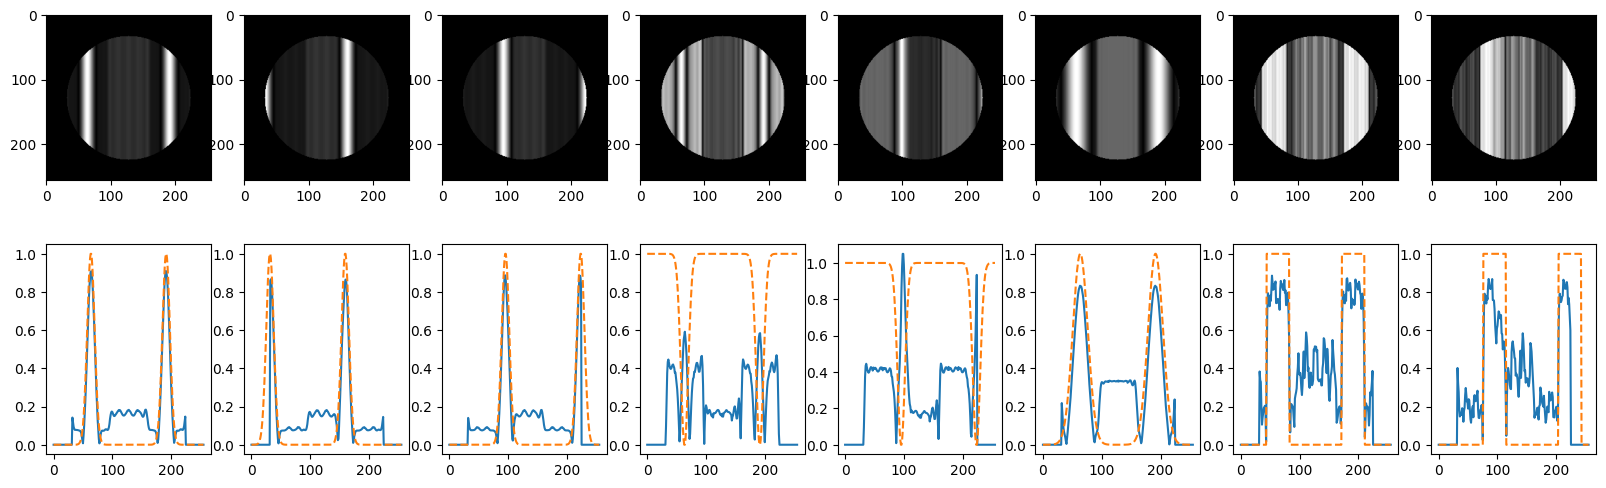

In [14]:
D = []
d_length = int(width / 2)
D.append(responses.gaussian(d_length, bw=0.2, shift=0))
D.append(responses.gaussian(d_length, bw=0.2, shift=-0.25))
D.append(responses.gaussian(d_length, bw=0.2, shift=0.25))
D.append(responses.notch(d_length, bw=0.2, shift=0))
D.append(responses.notch(d_length, bw=0.2, shift=0.25))
D.append(responses.gaussian(d_length, bw=0.4, shift=0))
D.append(responses.square(d_length, bw=0.3, shift=0))
D.append(responses.square(d_length, bw=0.3, shift=0.25))

for i in range(len(D)):
    D[i] = responses.make_periodic(D[i], 2)

G = []
A = []
for d in D:
    Ic, M, An = simulation.simulate_gasp(d, alpha = alpha, gradient = gradient, phantom_type=phantom_type, TRs=TRs)
    G.append(Ic)
    A.append(An)

simulation.view_gasp_comparison(G, D)

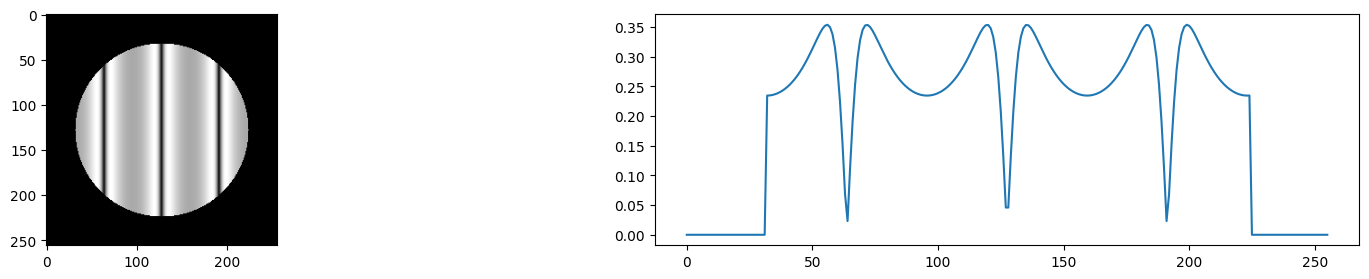

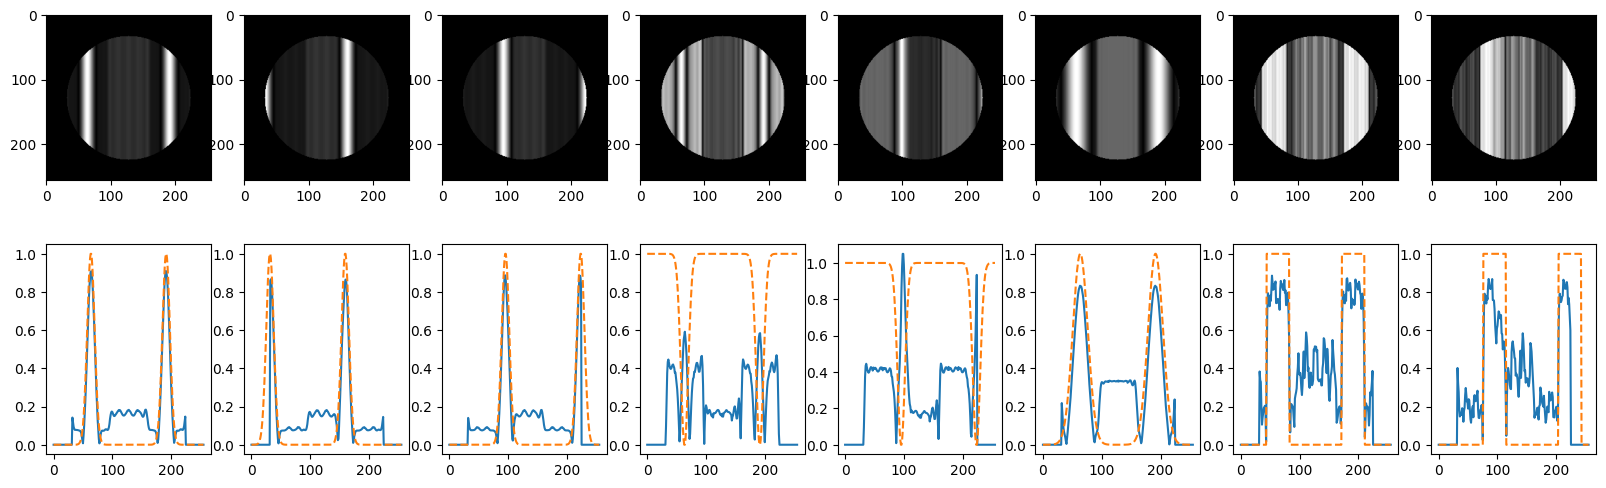

In [15]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(30)
gradient = 4 * np.pi
phantom_type = 'circle'

M = simulation.simulate_ssfp(alpha = alpha, gradient = gradient, phantom_type=phantom_type, TRs=TRs)
simulation.view_gasp_input(M)

I = []
M = np.reshape(M,(M.shape[0], M.shape[0], -1))
for An in A:
    In = simulation.evaluate_gasp(M, An[0])
    I.append(In)

simulation.view_gasp_comparison(I, D)

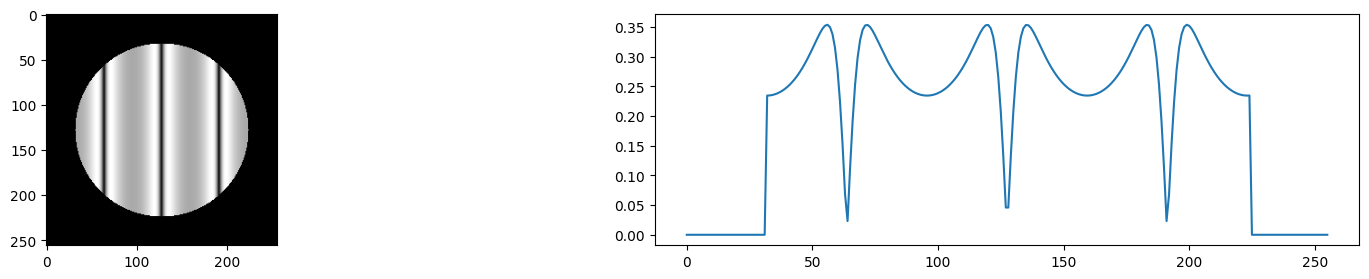

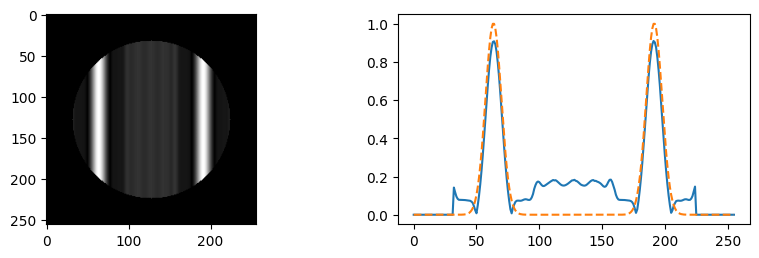

In [16]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(30)
gradient = 4 * np.pi
phantom_type = 'circle'

M = simulation.simulate_ssfp(alpha = alpha, gradient = gradient, phantom_type=phantom_type, TRs=TRs)
simulation.view_gasp_input(M)

M = np.reshape(M,(M.shape[0], M.shape[0], -1))
I = simulation.evaluate_gasp(M, A[0][0])

simulation.view_gasp(I, D[0])

In [17]:
M = dataset.load_dataset0()
print(M.shape)
M = np.reshape(M, (M.shape[0], M.shape[1], M.shape[2], -1))
print(M.shape)

Data: 20190401_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/136M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 4, 16, 3)
(128, 128, 4, 48)


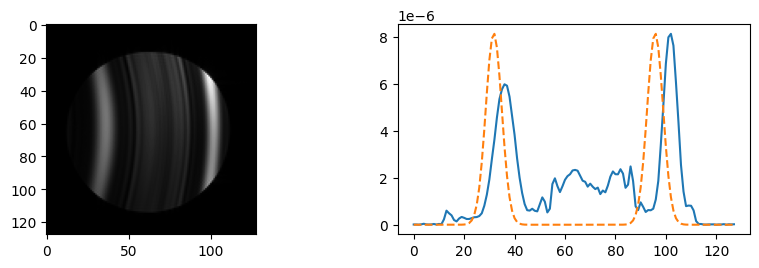

In [18]:
from scipy import signal
Mn = M[:,:,0,:]
I = simulation.evaluate_gasp(Mn, A[0][0])
s = np.abs(I[int(I.shape[0]/2), :])
d = signal.resample(D[0], 128)
d = d * max(s)
simulation.view_gasp(I, d)